Project Overview: Logistic Regression for Binary Classification
Goal: Predict whether a customer will buy a product (1) or not (0) based on features such as age, income, and gender.

1. Data Collection
We'll use the Kaggle Customer Purchase Prediction dataset or you can use the following synthetic dataset for simplicity:

In [1]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 70, size=200),
    'Income': np.random.randint(30000, 120000, size=200),
    'Gender': np.random.choice(['Male', 'Female'], size=200),
    'Purchased': np.random.choice([0, 1], size=200)
}

df = pd.DataFrame(data)
df.head()


,Age,Income,Gender,Purchased
0,62,47340,Female,0
1,65,31913,Male,1
2,18,82086,Female,0
3,21,43429,Male,0
4,21,43907,Female,1


We created a synthetic dataset with 200 samples. The features include age, income, and gender, while the target variable indicates whether the customer made a purchase.

2. EDA

Age          0
Income       0
Gender       0
Purchased    0
dtype: int64


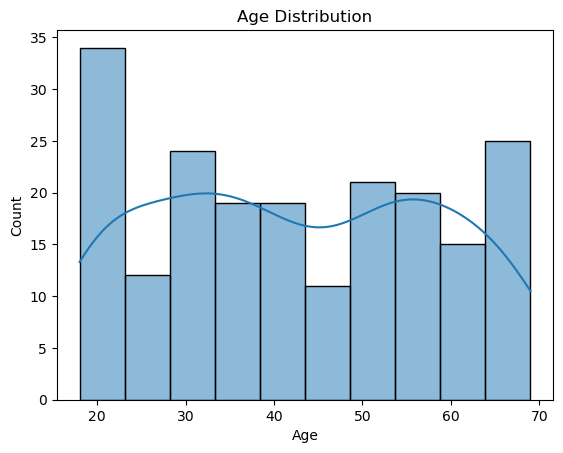

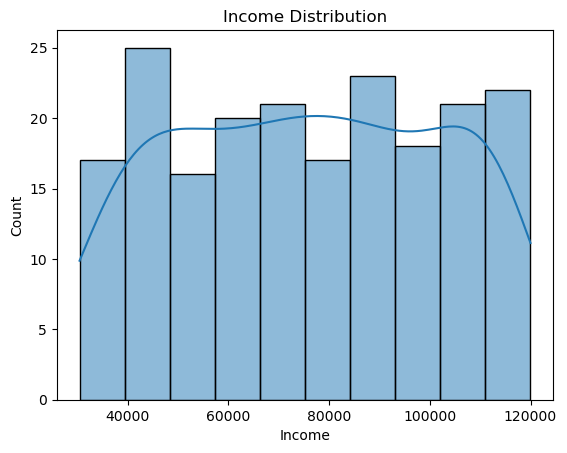

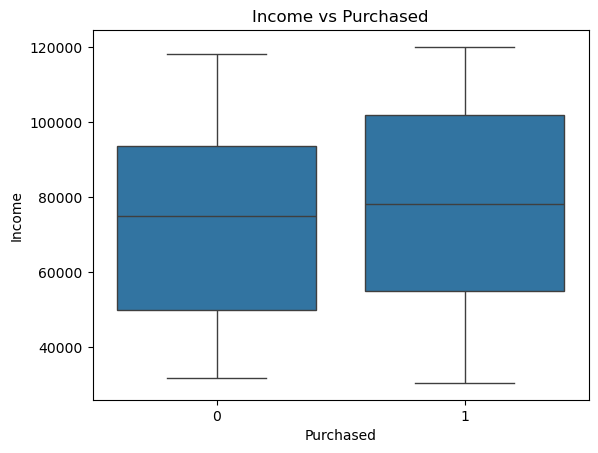

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of age and income
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.show()

# Visualize the relationship between income and purchase
sns.boxplot(x='Purchased', y='Income', data=df)
plt.title('Income vs Purchased')
plt.show()


We checked for missing values, which is crucial before modeling. Histograms show the distribution of age and income, helping us understand the data's structure. The boxplot illustrates the income distribution for those who made a purchase versus those who didn't, giving insights into potential correlations.


3. Data Preprocessing

In [3]:
# Convert categorical variables to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Split the dataset into features and target
X = df[['Age', 'Income', 'Gender']]
y = df['Purchased']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


We converted the categorical gender variable into numerical format. Then, we split the dataset into features (X) and the target (y), followed by dividing the data into training and testing sets for model evaluation.

In [4]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [6]:
# Create and train the logistic regression model with a different solver
model = LogisticRegression(solver='saga', max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, solver='saga')

In [7]:
model = LogisticRegression(C=0.01, max_iter=200)  # Regularization strength
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Make predictions on the test set
y_pred = model.predict(X_test)
# Make predictions and evaluate
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Make predictions and evaluate
y_pred_scaled = model.predict(X_test_scaled)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Confusion Matrix:
 [[ 0 14]
 [ 0 26]]
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

In this microproject, we implemented a logistic regression model to predict customer purchases using a synthetic dataset. The project included data collection, exploratory data analysis, model building, predictions, and evaluations. This process is essential for understanding how to apply machine learning techniques effectively.

We can see that the accuracy of the model is only 0.35, which is low. However, several things can be done to improve the model. One of the reasons for low accuracy could be that the model might be too simple for our data. We could experiment with more complex models such as decision trees. 